<a href="https://colab.research.google.com/github/zafrr/Basic-SQl/blob/main/Car_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [154]:
datafile = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv', sep = ',') 
datafile.head(8) #display upper 8 row
datafile.tail(8) #display lower 8 row

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4332,Mahindra Scorpio S2 7 Seater,2015,750000,120000,Diesel,Individual,Manual,First Owner
4333,Maruti Ritz VDi,2012,225000,90000,Diesel,Individual,Manual,Second Owner
4334,Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV,2012,600000,170000,Diesel,Individual,Manual,First Owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [155]:
datafile2 = datafile.rename(columns = {'selling_price' : 'Selling Price'}, inplace = False)
datafile2.head()

,name,year,Selling Price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [156]:
datafile2.dtypes

name             object
year              int64
Selling Price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [157]:
datafile2 = datafile2.drop_duplicates() #to drop any duplicate that might be bias

In [158]:
datafile2.shape # Returns our data's dimenstions for more clarity, instead of callin the data all over.

(3577, 8)

In [159]:
duplicate_rows_datafile2 = datafile2[datafile2.duplicated()]
print("number of duplicate rows: ", duplicate_rows_datafile2.shape) #checking the duplicate row
datafile2.count()

number of duplicate rows:  (0, 8)


name             3577
year             3577
Selling Price    3577
km_driven        3577
fuel             3577
seller_type      3577
transmission     3577
owner            3577
dtype: int64

In [160]:
datafile2.info()
datafile2.isnull().sum() #checking missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   Selling Price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


name             0
year             0
Selling Price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [161]:
pd.set_option('display.float_format', lambda x: '%.0f' % x) #To get rid of the "e" exponential notation
datafile2.describe()


,year,Selling Price,km_driven
count,3577,3577,3577
mean,2013,473913,69251
std,4,509302,47580
min,1992,20000,1
25%,2010,200000,36000
50%,2013,350000,60000
75%,2016,600000,90000
max,2020,8900000,806599


In [162]:
datafile2.describe(include = "object")

,name,fuel,seller_type,transmission,owner
count,3577,3577,3577,3577,3577
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,54,1800,2832,3265,2218


In [163]:
datafile2["car name"] = datafile["name"].apply(lambda x : ' '.join(x.split(' ')[:1]))
datafile2["car name"].value_counts()

Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: car name, dtype: int64

<ipython-input-164-4d52353d01f4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(datafile2.corr(), cbar=True, annot=True, cmap='Greens')


<Axes: title={'center': 'Correlation Matrix'}>

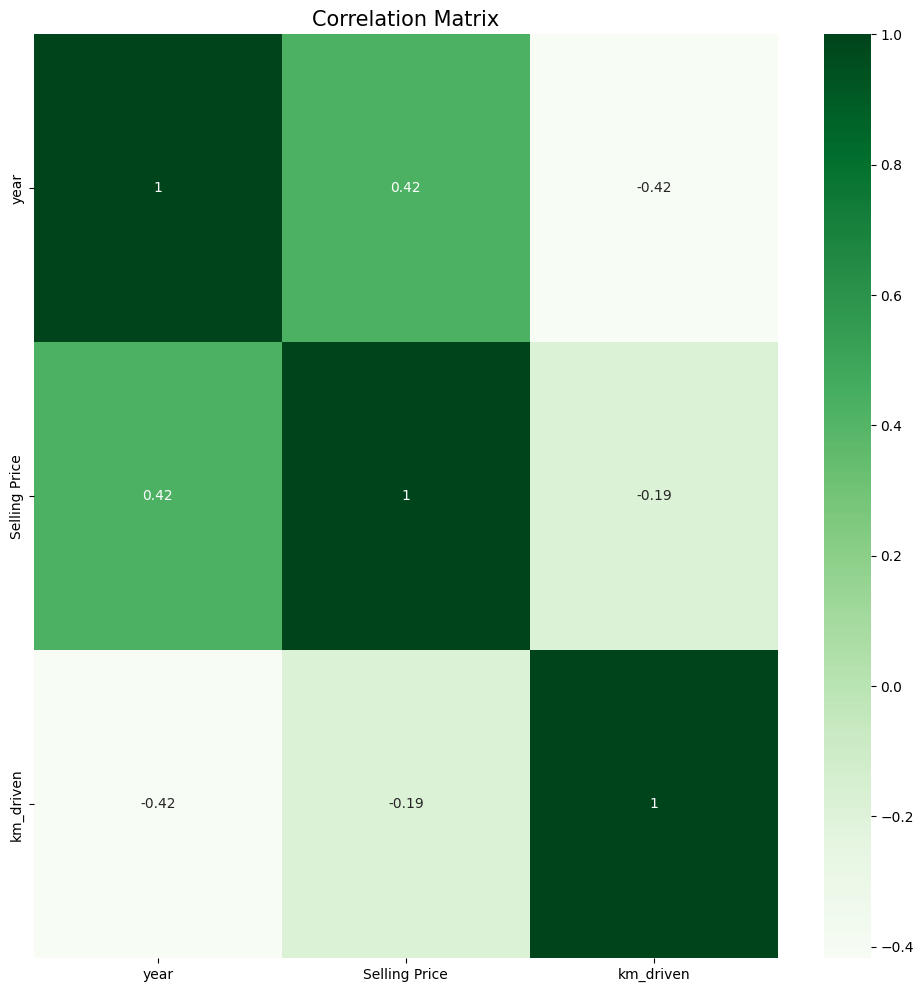

In [164]:
import seaborn as sns
plt.figure(figsize=(12,12))
plt.title('Correlation Matrix', fontsize=15)
sns.heatmap(datafile2.corr(), cbar=True, annot=True, cmap='Greens')

Text(0, 0.5, 'Selling Price')

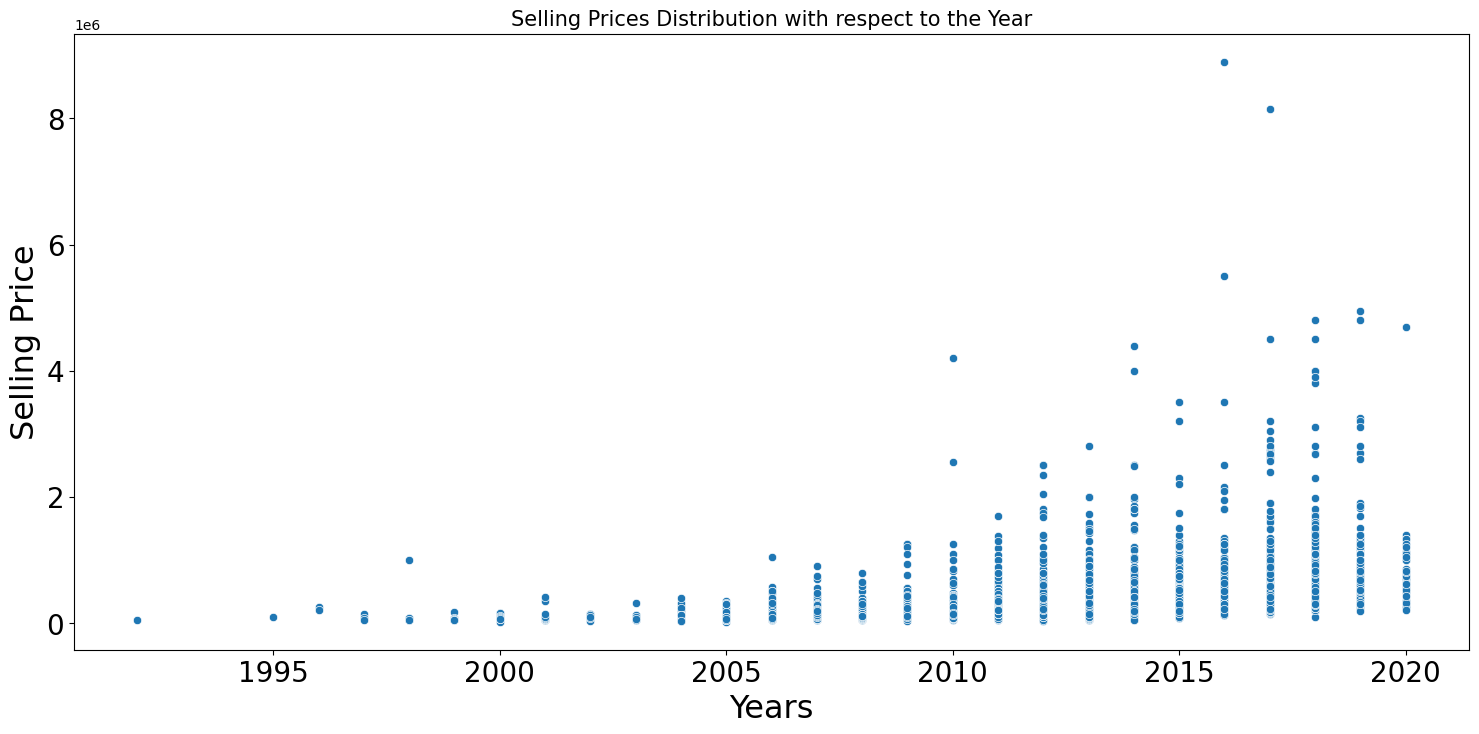

In [165]:
plt.figure(figsize=(18,8))
plt.title('Selling Prices Distribution with respect to the Year', fontsize=15)
sns.scatterplot(data=datafile2, x='year', y='Selling Price')
plt.ticklabel_format(style='scientific', axis='y')
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.xlabel("Years",fontsize=23) 
plt.ylabel("Selling Price",fontsize=23) 

Text(0, 0.5, 'Km Driven')

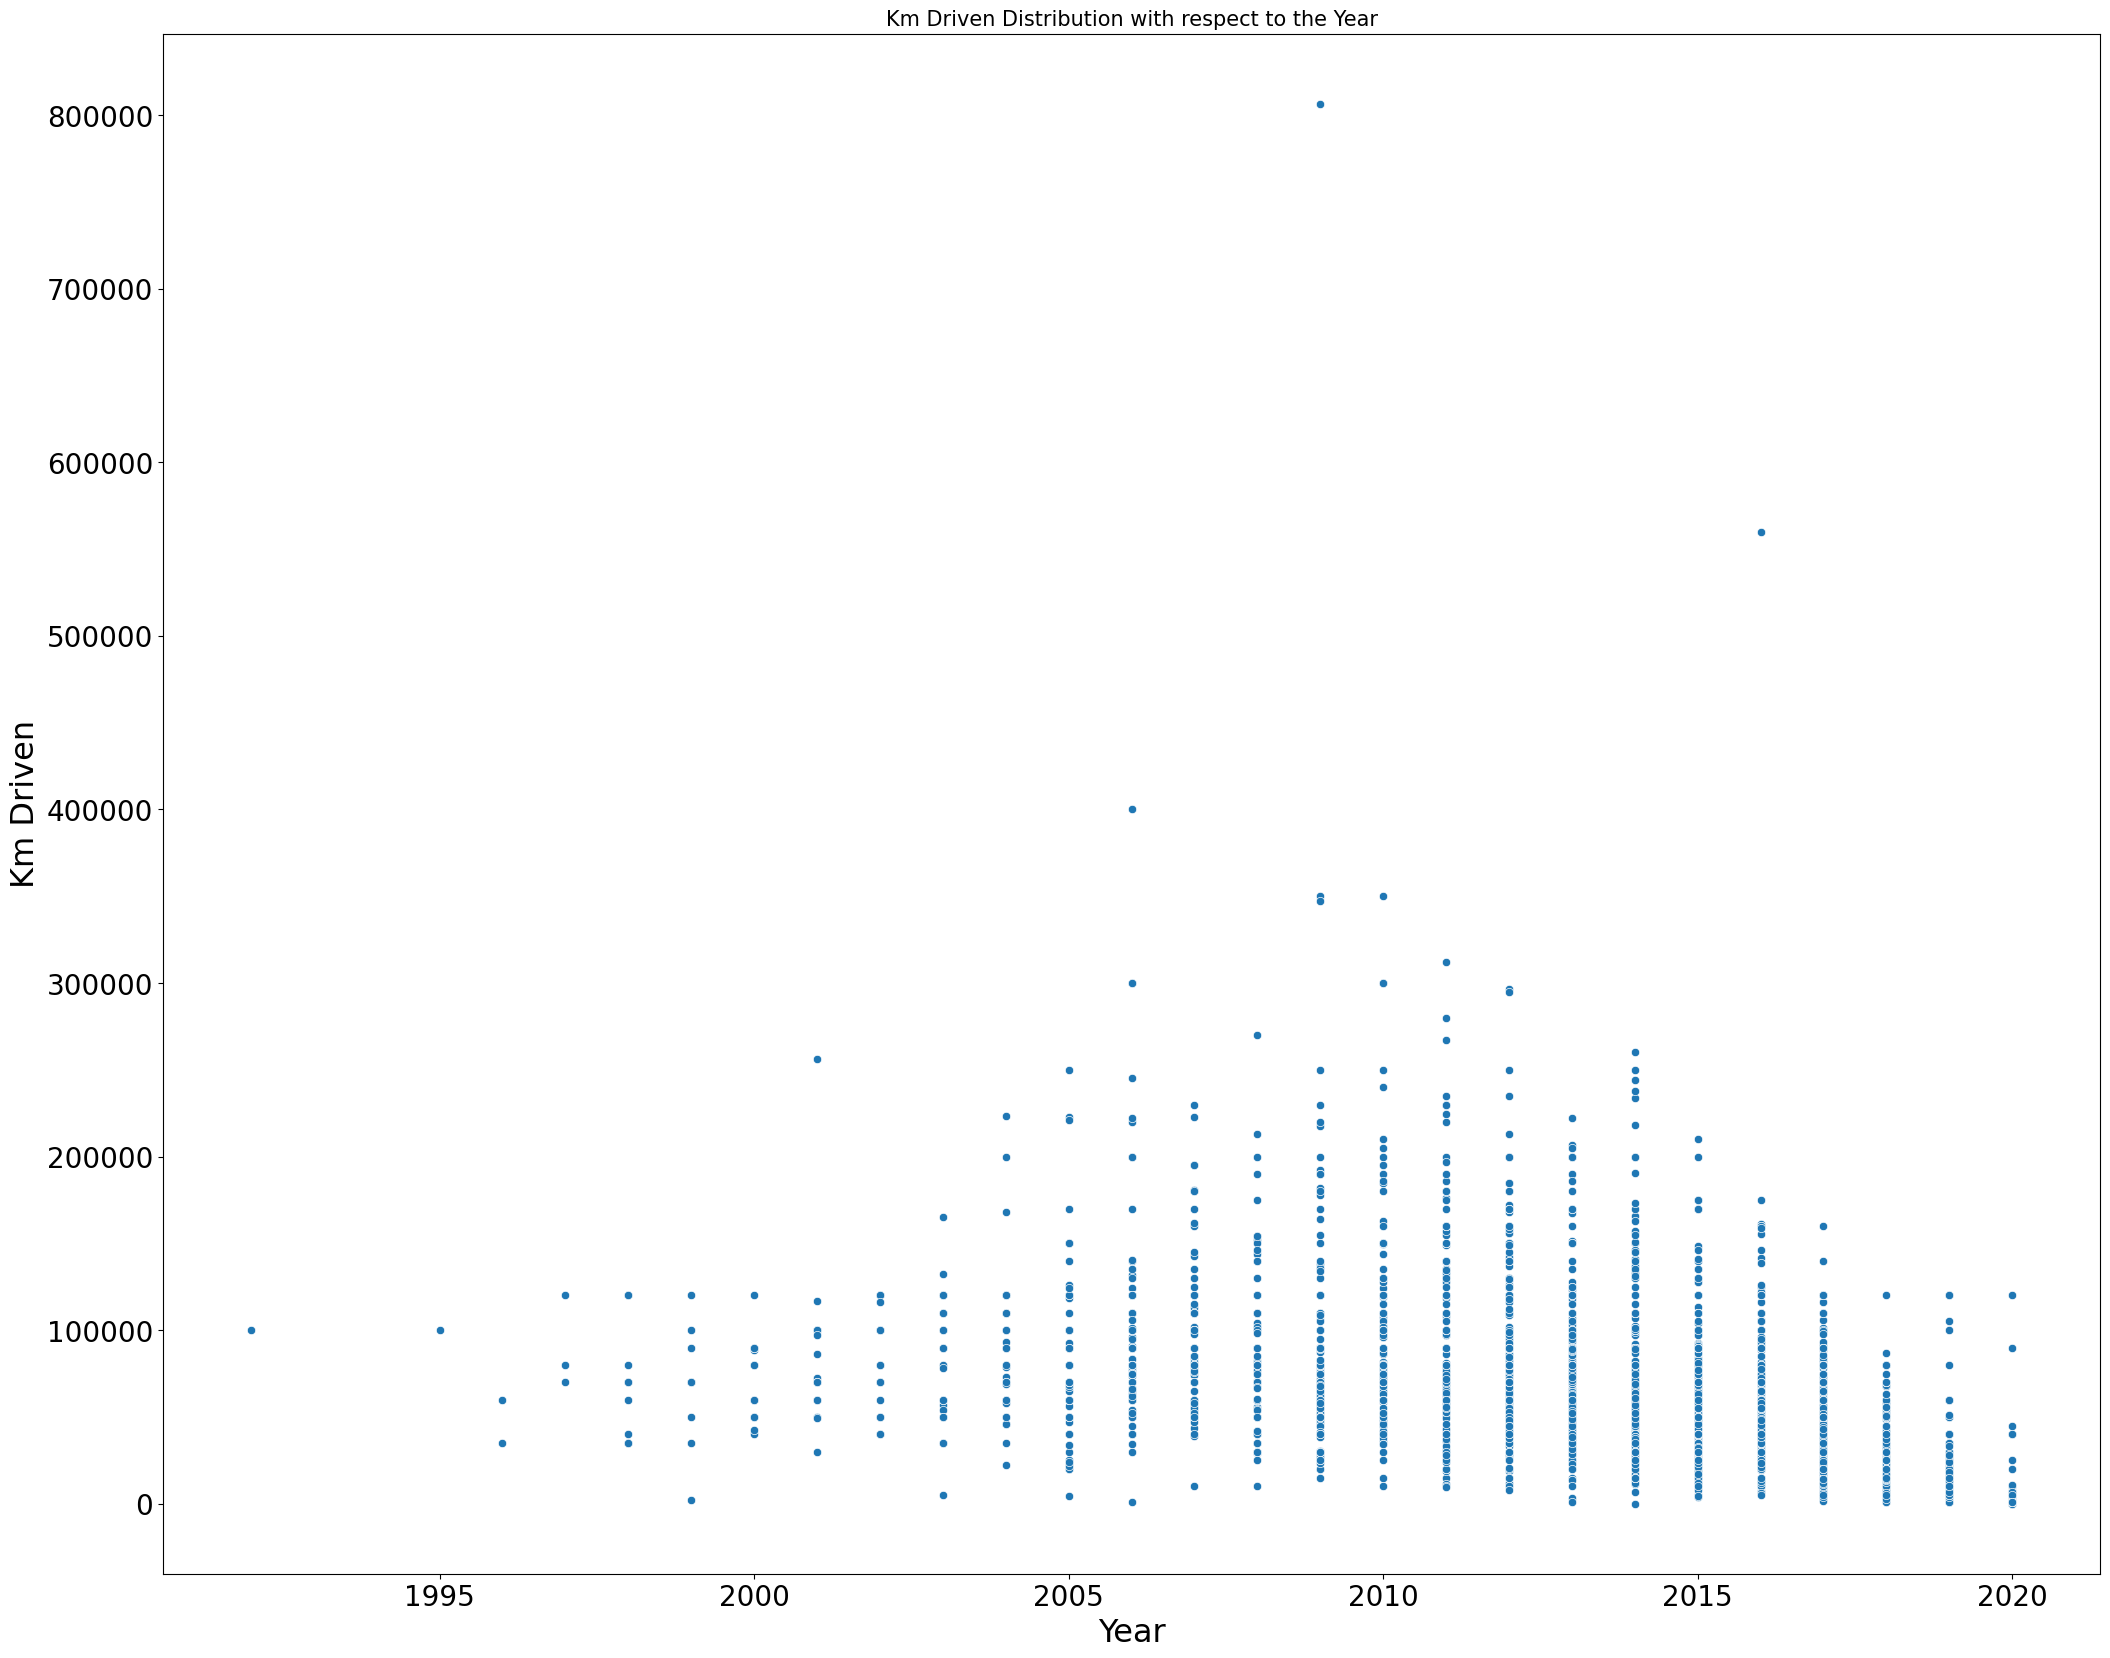

In [166]:
plt.figure(figsize=(25,20))
plt.title('Km Driven Distribution with respect to the Year', fontsize=15)
sns.scatterplot(data=datafile2, x='year', y='km_driven')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.xlabel("Year",fontsize=23) 
plt.ylabel("Km Driven",fontsize=23) 

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

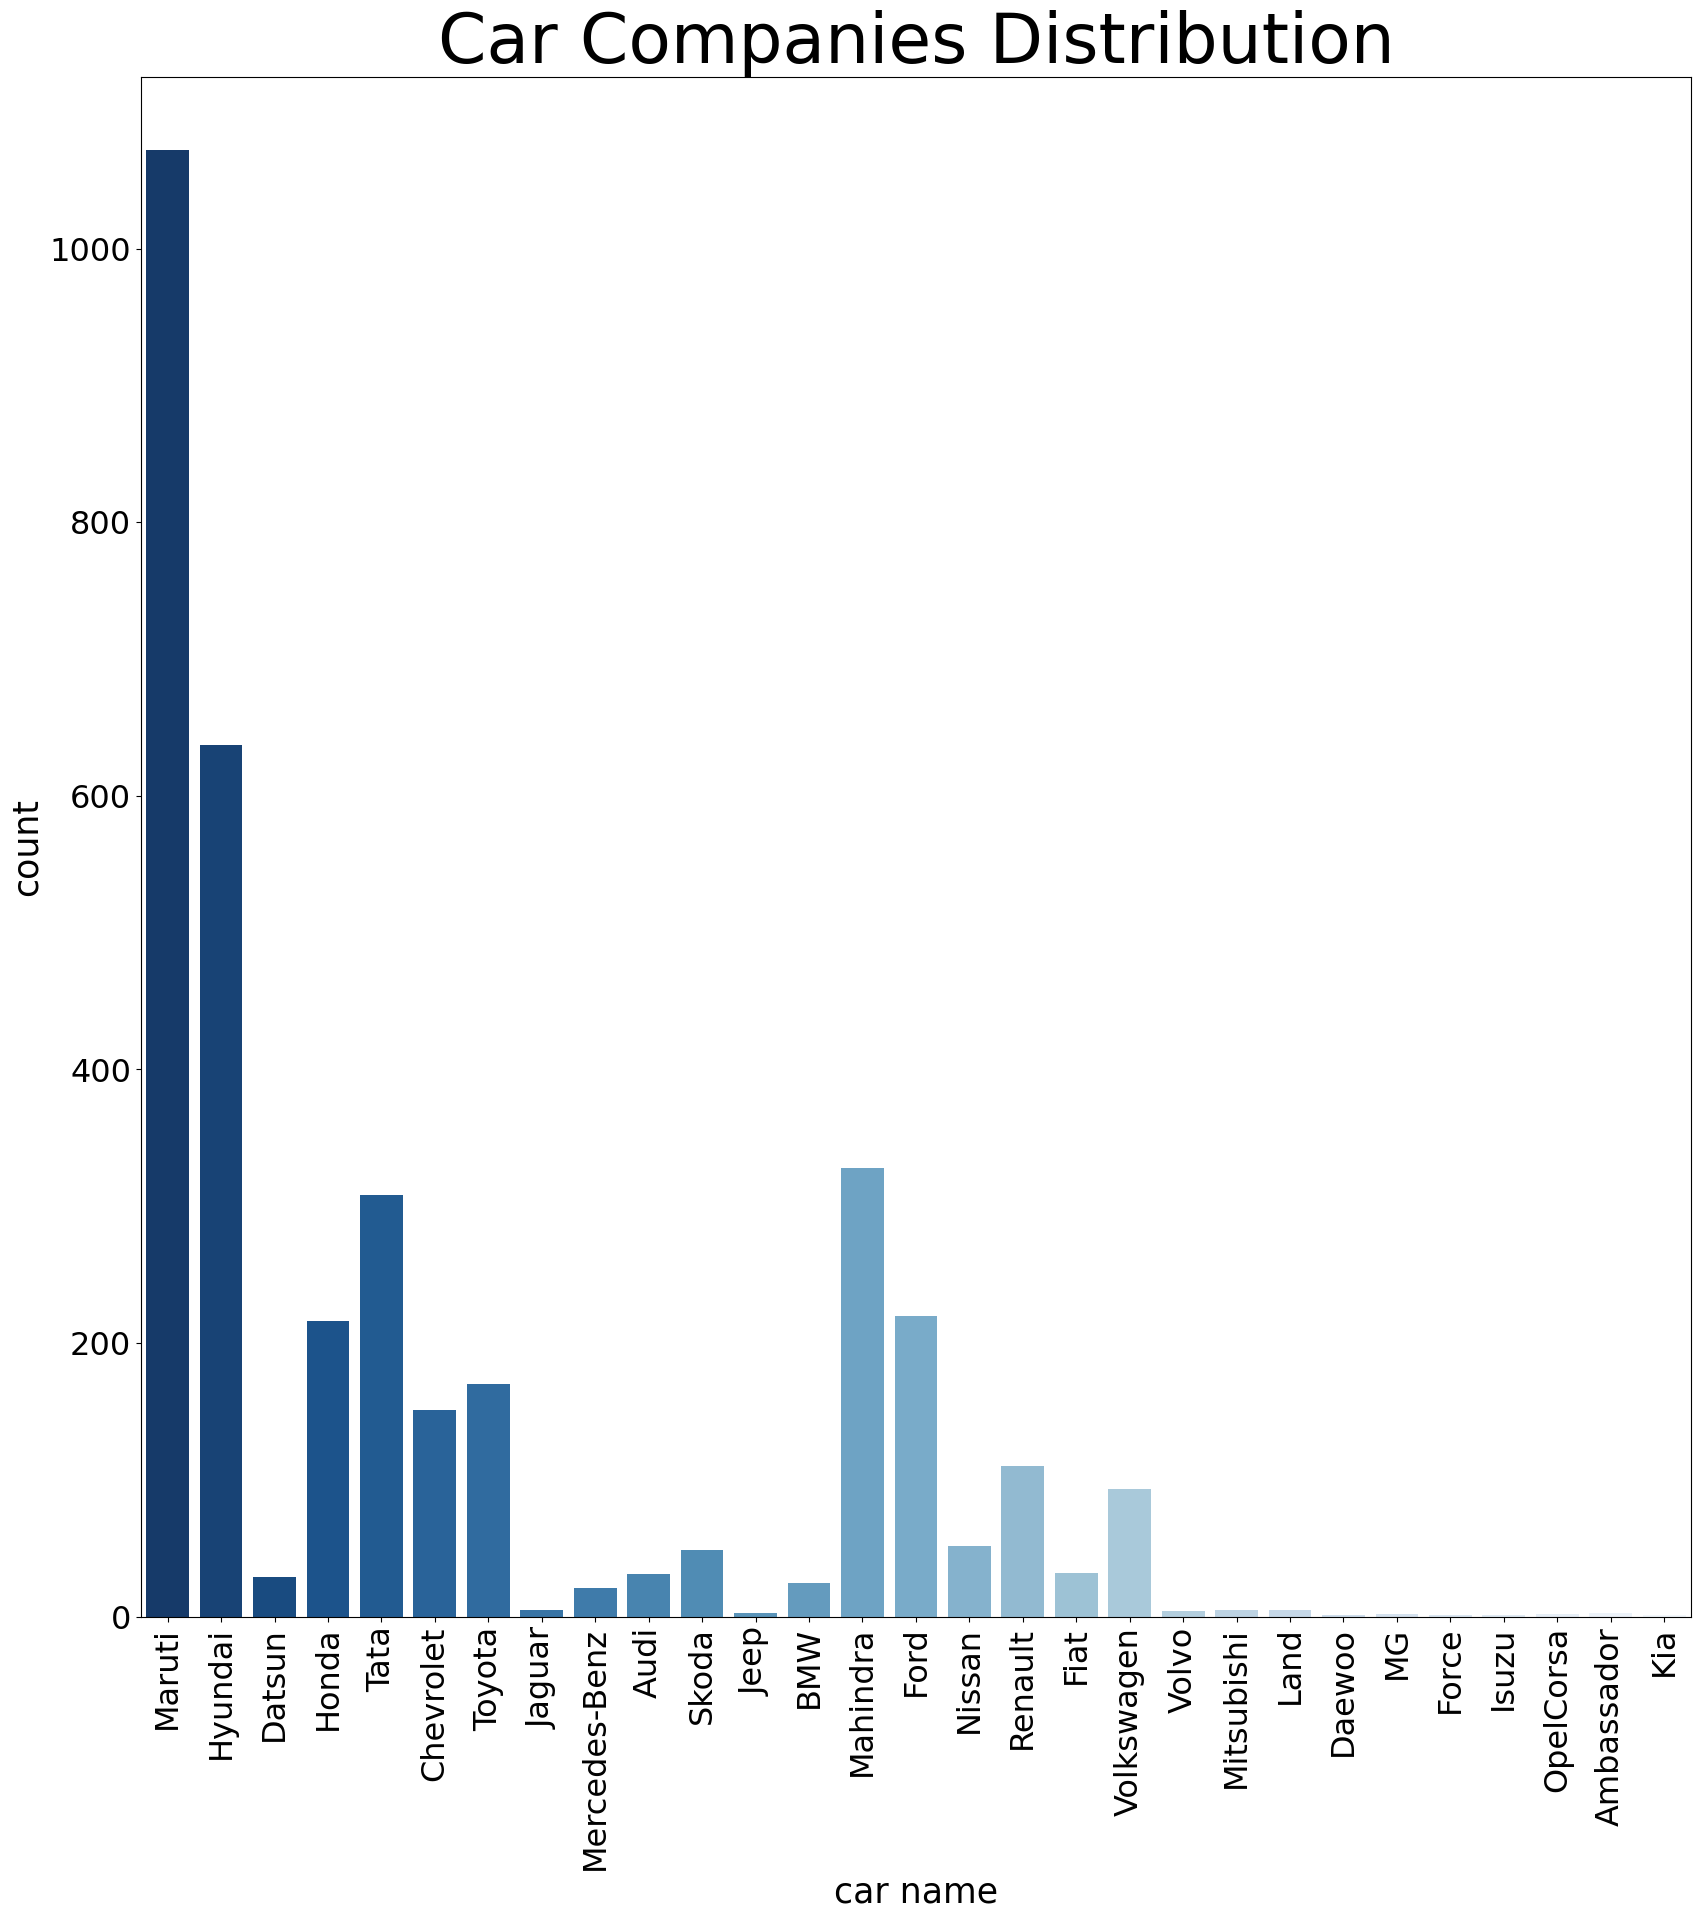

In [167]:
plt.figure(figsize = (20,20))
plt.title('Car Companies Distribution', fontsize=50)
plt.xlabel("Car Name",fontsize=25,color="black")
plt.ylabel("Car Count",fontsize=25,color="black")
plot = sns.countplot(x="car name", data=datafile2,  palette='Blues_r')
plt.xticks(fontsize=23, rotation = 90)
plt.yticks(fontsize=23)

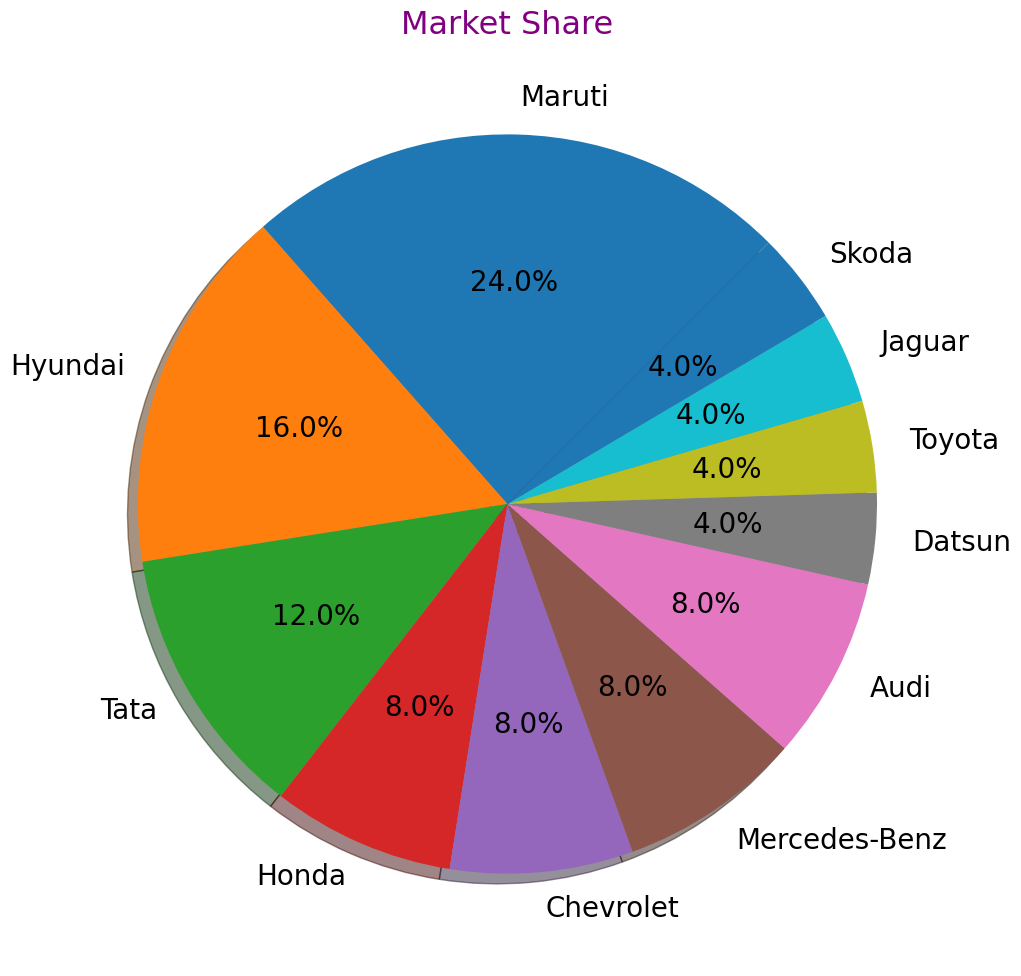

In [171]:
labels = datafile2["car name"][:25].value_counts().index
sizes = datafile2["car name"][:25].value_counts()
plt.figure(figsize = (12,12))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=True, startangle=45,textprops={'fontsize':20})
plt.title('Market Share',color = 'purple',fontsize = 23)
plt.show()

In [168]:
datafile2.columns

Index(['name', 'year', 'Selling Price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car name'],
      dtype='object')

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000., 4000000., 4500000.]),
 [Text(0, 0.0, '0'),
  Text(0, 500000.0, '500000'),
  Text(0, 1000000.0, '1000000'),
  Text(0, 1500000.0, '1500000'),
  Text(0, 2000000.0, '2000000'),
  Text(0, 2500000.0, '2500000'),
  Text(0, 3000000.0, '3000000'),
  Text(0, 3500000.0, '3500000'),
  Text(0, 4000000.0, '4000000'),
  Text(0, 4500000.0, '4500000')])

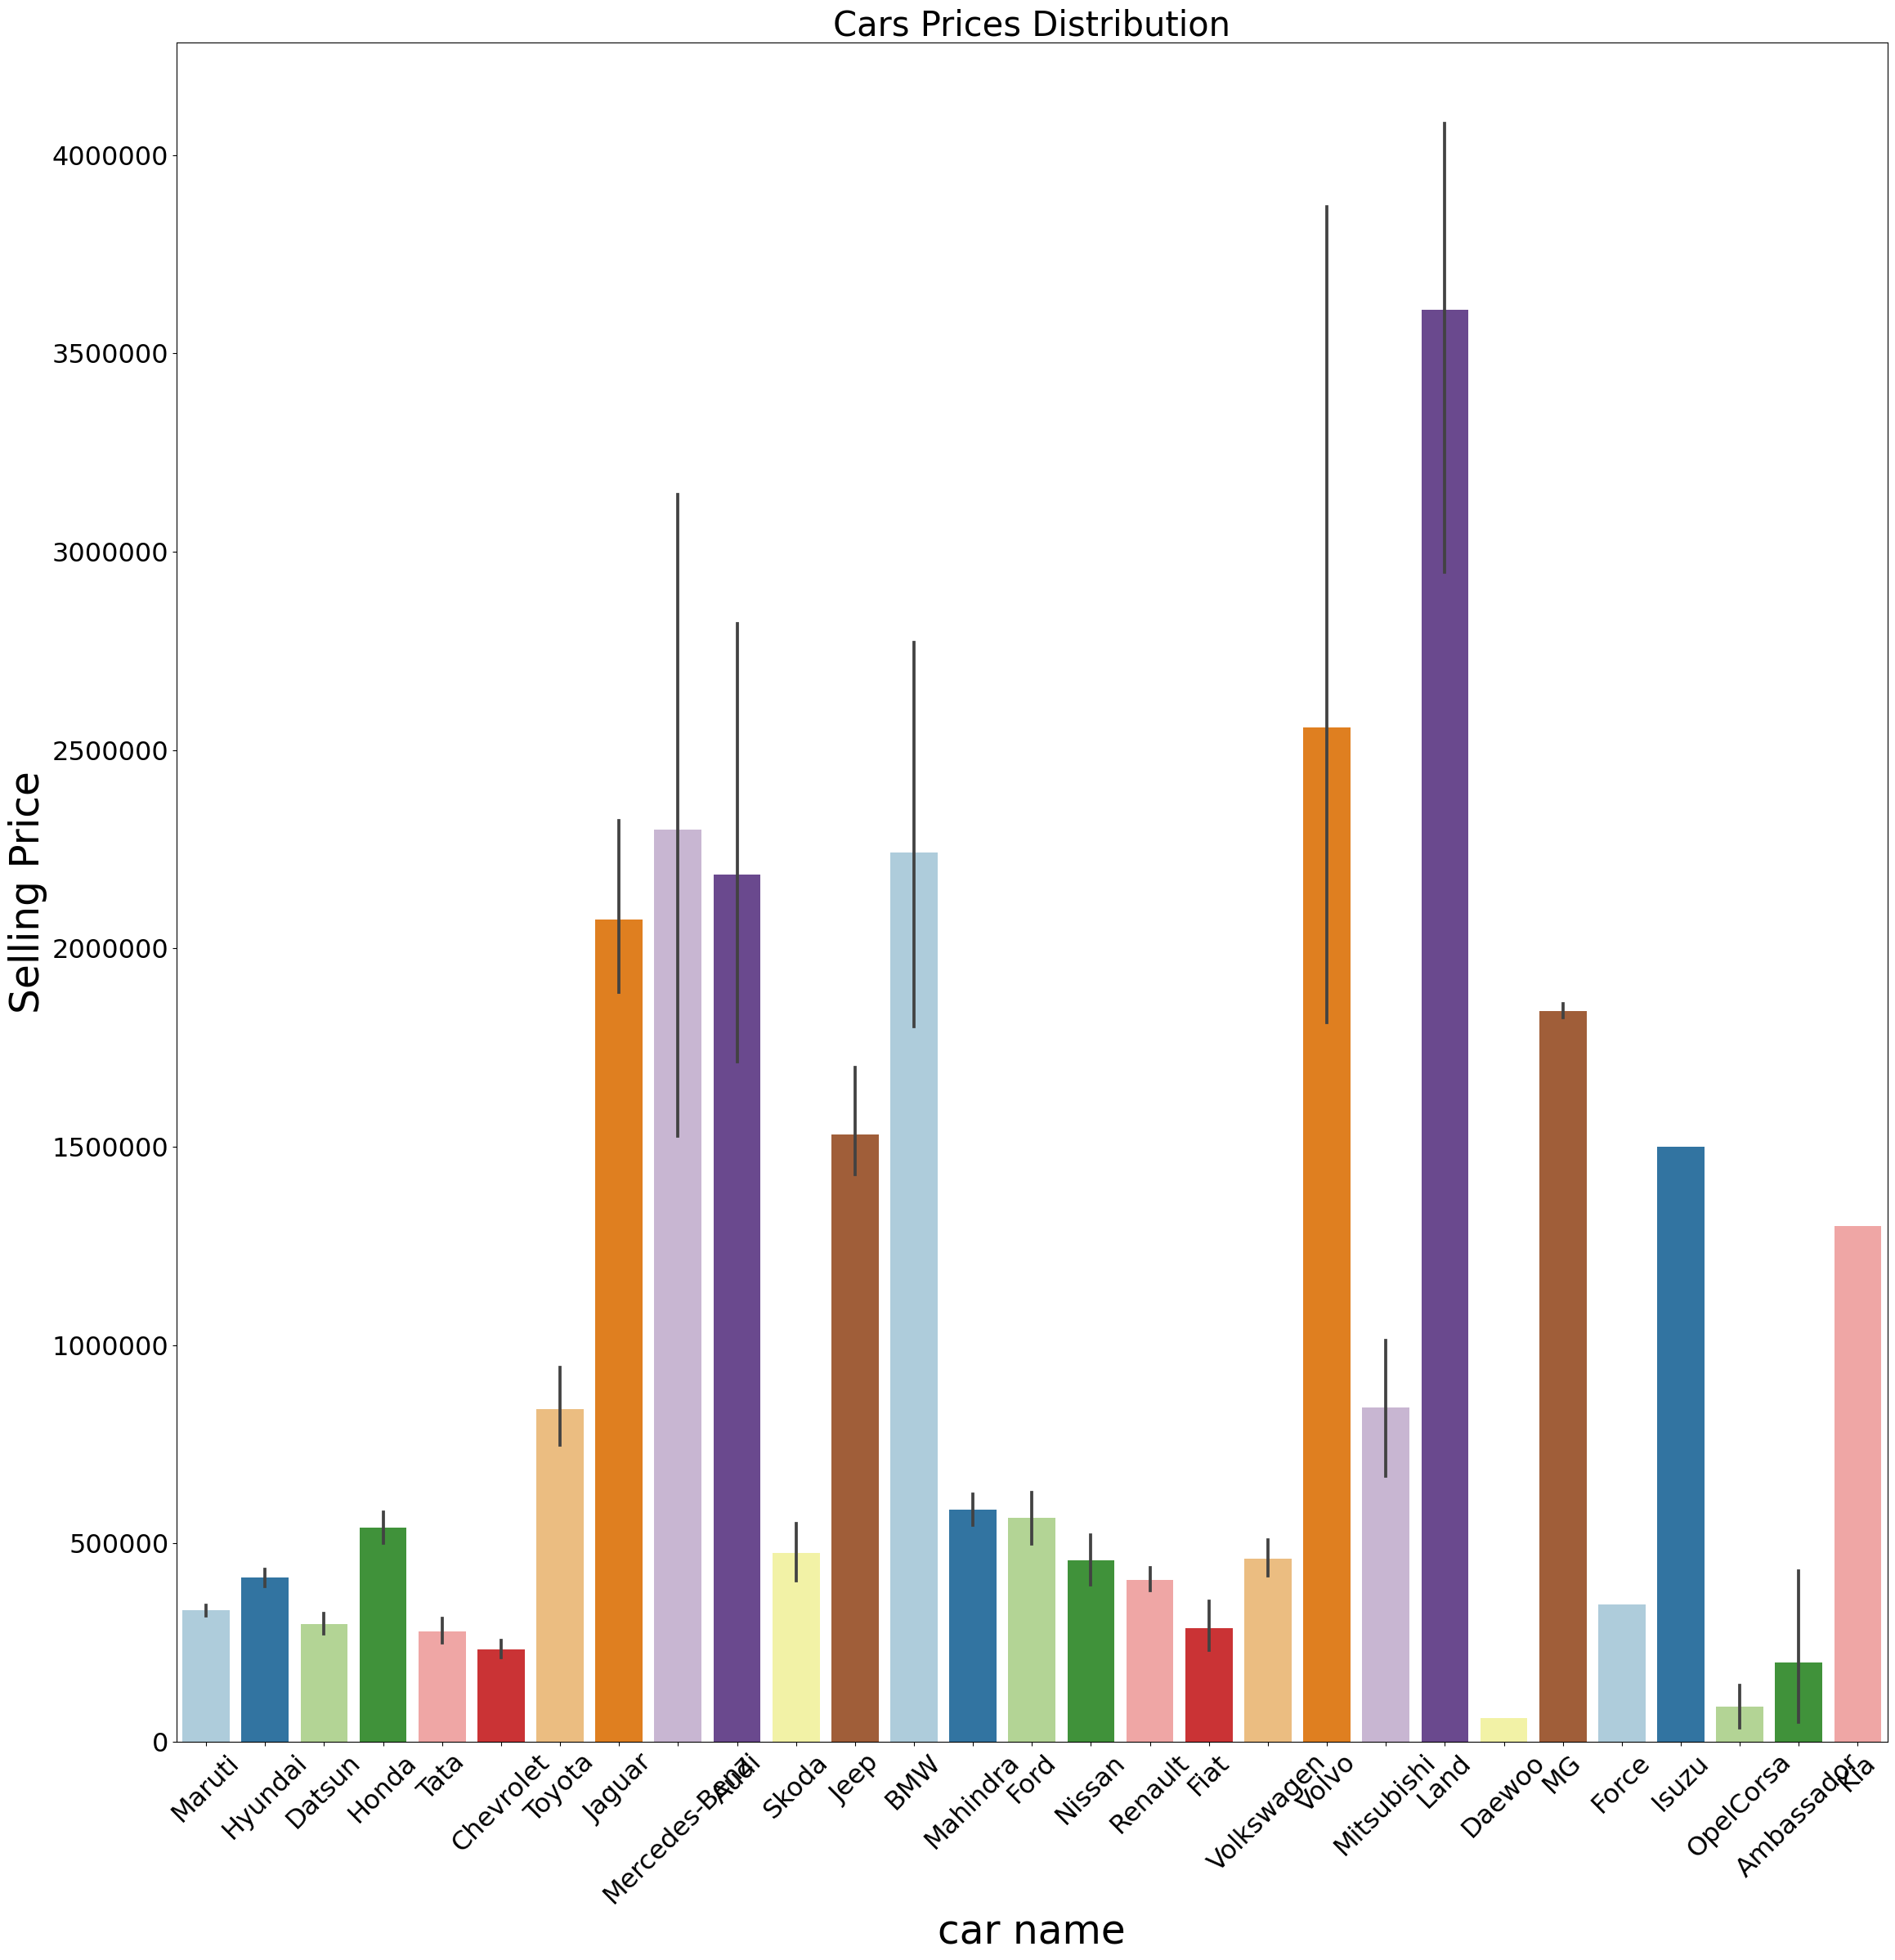

In [170]:
plt.figure(figsize = (27,27))
plt.ticklabel_format(style='plain') # To remove the exponential "e" notation.
plt.title('Cars Prices Distribution', fontsize=30)
plt.xlabel("Car Name",fontsize=35,color="black")
plt.ylabel("Car Price",fontsize=35,color="black")
plot = sns.barplot(x="car name", y = "Selling Price", data=datafile2,  palette="Paired")
plt.xticks(fontsize=23, rotation = 45)
plt.yticks(fontsize=23)